
<a href="https://githubtocolab.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_R1.ipynb" target="_parent\">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" > </a>


# Algoritmos de optimización - Reto 1

Nombre: <br> Miguel López Vélez <br>
Github: <br> [Astolfo2332](https://github.com/Astolfo2332/VIU_act) <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

Inicialmente, debemos de identificar el problema.

El problema de las torres de Hanoi consiste en mover una torre de fichas de un poste a otro, teniendo en cuenta que no se puede colocar una ficha más grande sobre una más pequeña.

Para su solución por el método divide y vencerás se realiza de la siguiente manera:

- Se divide el problema en subproblemas más pequeños, en este caso mover n-1 fichas a un poste auxiliar.
- Se mueve la ficha n a su destino.
- Se mueven las n-1 fichas al poste destino.
- Se repite el proceso hasta que todas las fichas estén en el poste destino.
- Se realiza la recursión de la función hasta que se cumpla la condición de parada.


In [174]:
# Torres de Hanoi
#Primero definimos el objeto torre de hanoi
class Hanoi:
    def __init__(self, n):
        #Inicializamos el número de discos y las torres
        self.n = n
        self.torres = [[i for i in range(n, 0, -1)], [], []]
        print(f"Torres iniciales: {self.torres}")

    def mover(self, origen, destino):
        #Generamos una función de mover la cual elimina el disco de la torre origen y lo coloca en la torre destino
        disco = self.torres[origen].pop()
        self.torres[destino].append(disco)
        print(f'Mover disco {disco} de torre {origen} a torre {destino}')
        print(self.torres)

    def resolver(self, n, origen, destino, auxiliar):
        #Generamos una función recursiva para resolver el problema
        if n == 1:
            self.mover(origen, destino)
        else:
            self.resolver(n-1, origen, auxiliar, destino)
            self.mover(origen, destino)
            self.resolver(n-1, auxiliar, destino, origen)

    def __str__(self):
        return str(self.torres)


hanoi = Hanoi(3)
hanoi.resolver(3, 0, 2, 1)

print("-"*50)

hanoi = Hanoi(4)
hanoi.resolver(4, 0, 1, 2)

Torres iniciales: [[3, 2, 1], [], []]
Mover disco 1 de torre 0 a torre 2
[[3, 2], [], [1]]
Mover disco 2 de torre 0 a torre 1
[[3], [2], [1]]
Mover disco 1 de torre 2 a torre 1
[[3], [2, 1], []]
Mover disco 3 de torre 0 a torre 2
[[], [2, 1], [3]]
Mover disco 1 de torre 1 a torre 0
[[1], [2], [3]]
Mover disco 2 de torre 1 a torre 2
[[1], [], [3, 2]]
Mover disco 1 de torre 0 a torre 2
[[], [], [3, 2, 1]]
--------------------------------------------------
Torres iniciales: [[4, 3, 2, 1], [], []]
Mover disco 1 de torre 0 a torre 2
[[4, 3, 2], [], [1]]
Mover disco 2 de torre 0 a torre 1
[[4, 3], [2], [1]]
Mover disco 1 de torre 2 a torre 1
[[4, 3], [2, 1], []]
Mover disco 3 de torre 0 a torre 2
[[4], [2, 1], [3]]
Mover disco 1 de torre 1 a torre 0
[[4, 1], [2], [3]]
Mover disco 2 de torre 1 a torre 2
[[4, 1], [], [3, 2]]
Mover disco 1 de torre 0 a torre 2
[[4], [], [3, 2, 1]]
Mover disco 4 de torre 0 a torre 1
[[], [4], [3, 2, 1]]
Mover disco 1 de torre 2 a torre 1
[[], [4, 1], [3, 2]]
Mov

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [4]:
import pytest
#Sucesión_de_Fibonacci
import sys
sys.setrecursionlimit(1000000)

def fibonacci_recursivo(n):
    if n <= 1:
        return n
    else:
        #Ya que el siguiente termino es nada más que la sumatoria de los dos anteriores a este
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

print(fibonacci_recursivo(40))
print(fibonacci_recursivo(15))


#Metodo iterativo
def fibonacci_iterativo(n):
    a = 0
    b = 1
    #Realizamos un for loop para ir sumando los valores de a y b en el rango de n
    for i in range(n):
        a, b = b, a + b
    return a

print(fibonacci_iterativo(10))
print(fibonacci_iterativo(15))

#Pruebas
def test_fibonacci():
    assert fibonacci_recursivo(10) == 55
    assert fibonacci_iterativo(10) == 55
test_fibonacci()

102334155
610
55
610


### Adicional Divide y venceras y memoización

Sabemos que el problema de fibonacci se puede descomponer como un conjunto de subproblemas que dependen de F(k), F(k-1) para construir a F(n)

Así si usamos las identidades de [fibonacci](https://mathworld.wolfram.com/FibonacciNumber.html):

$F(2k) = F(k) * [2*F(k-1) +F(k)]$ <br>
$F(2k+1) = F(k)^2 + F(k+1)^2$

Y guardamos los resultados anteriores para facilitar su consulta, podemos mejorar la eficiencia del algoritmo.

In [3]:
def fibonacci_divide(n, memo={}):
    #Establecemos el resultado para el primer caso
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    k = n // 2

    if n % 2 == 0:
        memo[n] = fibonacci_divide(k, memo) * (2 * fibonacci_divide(k - 1, memo) + fibonacci_divide(k, memo))
    else:
        memo[n] = fibonacci_divide(k, memo) ** 2 + fibonacci_divide(k + 1, memo) ** 2

    return memo[n]

print(fibonacci_divide(10))
print(fibonacci_divide(15))

55
610



Ahora gráficamos el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [5]:
import time
import matplotlib.pyplot as plt

def medir_tiempo(func,  n):
    tiempo_inicial = time.time()
    func(n)
    tiempo_final = time.time()
    return tiempo_final - tiempo_inicial


In [6]:
n_values = list(range(1, 40))

tiempos_recursivo = [medir_tiempo(fibonacci_recursivo, n) for n in n_values]
tiempos_iterativo = [medir_tiempo(fibonacci_iterativo, n) for n in n_values]
tiempos_divide = [medir_tiempo(fibonacci_divide, n) for n in n_values]


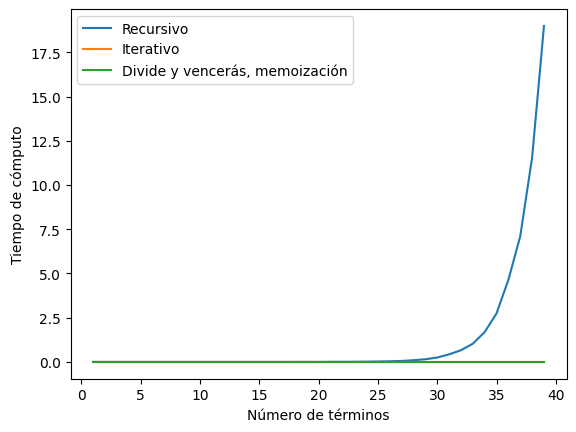

In [7]:
plt.plot(n_values, tiempos_recursivo, label='Recursivo')
plt.plot(n_values, tiempos_iterativo, label='Iterativo')
plt.plot(n_values, tiempos_divide, label='Divide y vencerás, memoización')
plt.xlabel('Número de términos')
plt.ylabel('Tiempo de cómputo')
plt.legend()
plt.show()




### Comparación entre técnicas iterativas

In [29]:
n_values = list(range(1, 10000 * 20, 10000))

tiempos_iterativo = [medir_tiempo(fibonacci_iterativo, n) for n in n_values]
tiempos_divide = [medir_tiempo(fibonacci_divide, n) for n in n_values]


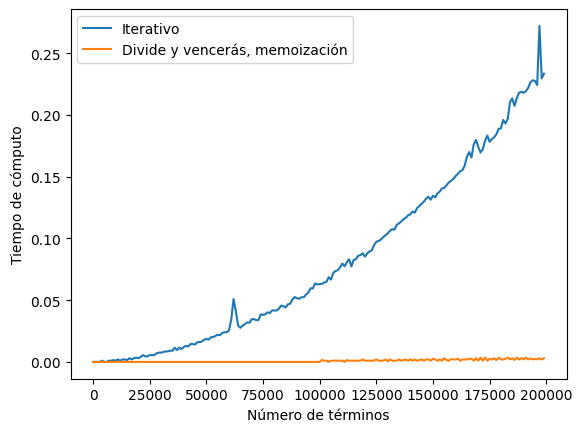

In [31]:

plt.plot(n_values, tiempos_iterativo, label='Iterativo')
plt.plot(n_values, tiempos_divide, label='Divide y vencerás, memoización')
plt.xlabel('Número de términos')
plt.ylabel('Tiempo de cómputo')
plt.legend()
plt.show()


También podemos calcular la complejidad de ambos algoritmos.

In [2]:
import big_o

results_rec = big_o.big_o(fibonacci_recursivo, big_o.datagen.n_, n_repeats=10, min_n=1, max_n=40)
results_it = big_o.big_o(fibonacci_iterativo, big_o.datagen.n_, n_repeats=10, min_n=1, max_n=40)

In [5]:
print(results_rec[0])
print(results_it[0])

Exponential: time = 2.6E-06 * 1.6^n (sec)
Constant: time = 1.6E-05 (sec)


De esta manera podemos probar que el algoritmo recursivo tiene una complejidad exponencial O(2^n) mientras que el algoritmo iterativo tiene una complejidad lineal O(n).

Esto debido a la propía implementación de cada algoritmo al ser recursivo se va a llamar a sí mismo n veces, mientras que el iterativo solo se va a llamar n veces.

Siendo en este caso mejor solución y más eficiente el algoritmo iterativo. Más, sin embargo, es mejor usar la fórmula de [Binet](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci#Equation_5) para calcular la sucesión de Fibonacci.

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

Para implementar la solución nos basamos en el texto guia de la forma:

- Ordenamos los valores (1, v1, v2, ...), de mayor a menor. Estas serán las etapas y, una vez considerada una etapa, ya no volveremos a ella.
- En cada etapa, tomamos tantas monedas como podamos (técnica voraz) para acercarnos lo más posible a la cantidad C teniendo en cuenta la cantidad acumulada en las etapas anteriores. Se guarda en un vector V el número de monedas tomadas en cada etapa en la posición i

Para identificar la cantidad de monedas tomadas se realiza una división entera de la cantidad entre el valor de la mondeda, y se guarda en el vector solución. Luego aplicamos el modulo de la cantidad entre el valor de la moneda para seguir con la siguiente moneda.

Logrando así una solución en términos de O(n) donde n es la cantidad de monedas que se tienen.

In [102]:
# Problema del cambio de moneda
import pytest

def cambio_monedas(cantidad, monedas):
    #Ordenamos las monedas de mayor a menor
    #Ya que necesitamos conocer el valor descendente de monedas
    #Inicializamos uan lista vacía para guardar la solución
    solucion = [0 for _ in monedas]
    #Ordenamos las monedas de mayor a menor para poder hacer la división
    for i, valor in enumerate(sorted(monedas, reverse=True)):
        solucion[i] = cantidad // valor
        cantidad %= valor
    return solucion

print(cambio_monedas(200, [25, 10, 5, 1]))
print(cambio_monedas(128, [30, 20, 15, 5, 2, 1]))


#Pruebas
def test_cambio_monedas():
    assert cambio_monedas(123, [25, 10, 5, 1]) == [4, 2, 0, 3]
    assert cambio_monedas(123, [25, 10, 5, 1]) != [4, 2, 1, 3]

test_cambio_monedas()

[8, 0, 0, 0]
[4, 0, 0, 1, 1, 1]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

Recordando como funciona la técnica de backtracking se basa en la idea de generar todo el conjunto de soluciones a un problema, esto a partir de la combinación de las soluciones parciales en forma de árbol y cuando se llega a una solución no válida se poda la rama y se continúa con la siguiente.

Para dar solución al problemas de las N-reinas se realiza de la siguiente manera:

- Se crea un tablero de NxN con ceros.
- Se coloca una reina en la primera fila y se comprueba si es segura.
- Si es segura se coloca la reina en la siguiente fila y se repite el proceso.
- Si no es segura se mueve la reina a la siguiente columna y se repite el proceso de comprobación.

Para establecer la seguridad de la reina existen las condiciones de:

- No se pueden colocar 2 reinas en la misma columna, esto se verifica sumando la fila en el caso de que sea 1 está en peligro.
- No se pueden colocar 2 reinas en la misma fila, de manera similar al anterior puede ser verificado con una suma.
- Se puede almacenar las posiciones de las reinas y mediante un valor absoluto dado por $ | x_1 - y_1 | = | x_2 - y_2 |$, donde $x_n$ y $y_n$ son las posiciones de las reinas, podemos descartar en el caso que esten en la misma diagonal



In [156]:
# Problema de las N-Reinas
import pytest
import numpy as np


class NReinas:
    def __init__(self, n):
        #Inicializamos la cantidad de reinas y el tablero
        self.n = n
        self.tablero = np.zeros((n, n), dtype=int)
        self.reinas_det_pos =set()
        self.reinas_det_neg =set()

    def es_segura(self, fila, columna):
        if np.sum(self.tablero[:, columna]) == 1:
            return False
        if np.sum(self.tablero[fila, :]) == 1:
            return False
        if (fila - columna) in self.reinas_det_neg or (fila + columna) in self.reinas_det_pos:
            return False
        return True

    def resolver(self, fila=0):
        #Caso cuando se colocan todas las reinas
        if fila == self.n:
            return True
        for columna in range(self.n):
            if self.es_segura(fila, columna):

                self.tablero[fila, columna] = 1
                current_det =fila - columna
                self.reinas_det_neg.add(current_det)
                plus_det = fila + columna
                self.reinas_det_pos.add(plus_det)
                #Evaluamos si existe una siguiente solución
                if self.resolver(fila + 1):
                    return True
                #Reset en el caso de que la siguiente solución no exista
                self.tablero[fila, columna] = 0
                self.reinas_det_neg.discard(current_det)
                self.reinas_det_pos.discard(plus_det)
        return False

    def __str__(self):
        return str(self.tablero)

test_sol = []
for i in range (1, 10):
    reinas = NReinas(i)
    status = reinas.resolver()
    test_sol.append(reinas)
    if not status:
        print(f'No se encontró solución para {i} reinas')
        continue
    print(reinas)



[[1]]
No se encontró solución para 2 reinas
No se encontró solución para 3 reinas
[[0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]]
[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]]
[[0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]]
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
[[1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0]]


Solución adicional por iteraciones en columnas, filas y diagonales anteriores.

In [155]:
class NReinas_loop:
    def __init__(self, n):
        #Inicializamos la cantidad de reinas y el tablero
        self.n = n
        self.tablero = np.zeros((n, n), dtype=int)
        self.reinas_det =set()

    def es_segura(self, fila, columna):
          # Verificar la columna
        for i in range(fila):
            if self.tablero[i, columna] == 1:
                return False
        # Verificar la diagonal superior izquierda
        for i, j in zip(range(fila, -1, -1), range(columna, -1, -1)):
            if self.tablero[i, j] == 1:
                return False
        # Verificar la diagonal superior derecha
        for i, j in zip(range(fila, -1, -1), range(columna, self.n)):
            if self.tablero[i, j] == 1:
                return False
        return True

    def resolver(self, fila=0):
        #Caso cuando se colocan todas las reinas
        if fila == self.n:
            return True
        for columna in range(self.n):
            if self.es_segura(fila, columna):
                self.tablero[fila, columna] = 1
                if self.resolver(fila + 1):
                    return True
                #Reset en el caso de que la siguiente solución no exista
                self.tablero[fila, columna] = 0
        return False

    def __str__(self):
        return str(self.tablero)

correct_sol = []
for i in range (1, 10):
    reinas = NReinas(i)
    status = reinas.resolver()
    correct_sol.append(reinas)
    if not status:
        print(f'No se encontró solución para {i} reinas')
        continue
    print(reinas)


[[1]]
No se encontró solución para 2 reinas
No se encontró solución para 3 reinas
[[0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]]
[[1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]]
[[0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]
[[1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]]
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]
[[1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0]]


In [157]:
#Pruebas

def test_reinas():
    sol_num = 1
    for corr_sol, test in zip(correct_sol, test_sol):
        print(f'Solución {sol_num}')
        assert np.isclose(corr_sol.tablero, test.tablero).all()
        sol_num += 1

test_reinas()


Solución 1
Solución 2
Solución 3
Solución 4
Solución 5
Solución 6
Solución 7
Solución 8
Solución 9


Comparación de ambas soluciones

In [151]:
def solve_queens(n):
    reinas = NReinas(n)
    reinas.resolver()
    return reinas

def solve_queens_loop(n):
    reinas = NReinas_loop(n)
    reinas.resolver()
    return reinas


n_values = list(range(1, 28, 2))

tiempos_almacenando = [medir_tiempo(solve_queens, n) for n in n_values]
tiempos_loop = [medir_tiempo(solve_queens_loop, n) for n in n_values]


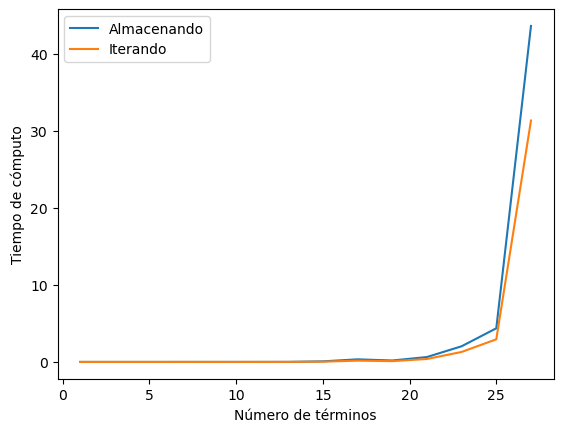

In [152]:
plt.plot(n_values, tiempos_almacenando, label='Almacenando')
plt.plot(n_values, tiempos_loop, label='Iterando')
plt.xlabel('Número de términos')
plt.ylabel('Tiempo de cómputo')
plt.legend()
plt.show()


En este caso el método iterativo parece ser mejor que las restricciones por determinante de las diagonales, tanto en términos de tiempo como de memoria al no requerir variables adicionales. Aunque en términos de complejidad ambos son O(n^2) por la cantidad de iteraciones que se realizan en el tablero.